<a href="https://colab.research.google.com/github/takashi4488/rabbit_challenge/blob/main/skl_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>線形回帰モデル-Boston Hausing Data-</h1>

<h2>1. 必要モジュールとデータのインポート</h2>

In [28]:
#California Housingのデータを使って、住宅価格を分析する。
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [30]:
# データ取得
data = fetch_california_housing()
# 特徴量DataFrame
df = pd.DataFrame(data.data,columns=data.feature_names)
# 目的変数を追加
df["MedHouseVal"] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
#データ観察
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#住宅価格との相関関係を測定
corr = df.corr()
corr["MedHouseVal"].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


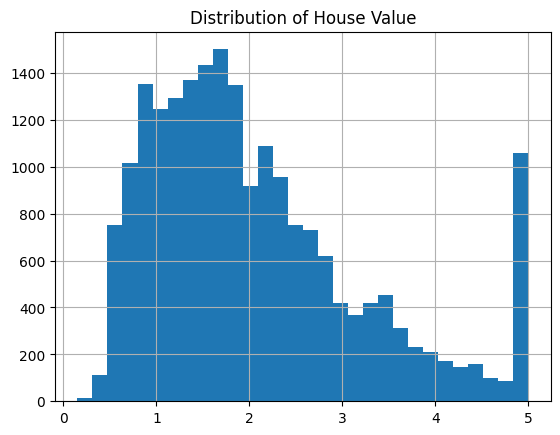

In [18]:
import matplotlib.pyplot as plt

df["MedHouseVal"].hist(bins=30)
plt.title("Distribution of House Value")
plt.show()

In [32]:
# 単回帰分析（MedInc → 住宅価格）
# MedIncが一番相関関係が高かったので選定。
X_single = df[["MedInc"]]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)

model_single = LinearRegression()
model_single.fit(X_train, y_train)

y_pred_single = model_single.predict(X_test)


In [31]:
# --- 単回帰 ---
print("=== 単回帰（MedInc → MedHouseVal） ===")
r2_single = r2_score(y_test, y_pred_single)
mse_single = mean_squared_error(y_test, y_pred_single)
rmse_single = np.sqrt(mse_single)
mae_single = mean_absolute_error(y_test, y_pred_single)

print(f"R2   : {r2_single:.4f}")
print(f"MSE  : {mse_single:.4f}")
print(f"RMSE : {rmse_single:.4f}")
print(f"MAE  : {mae_single:.4f}")



=== 単回帰（MedInc → MedHouseVal） ===
R2   : 0.4589
MSE  : 0.7091
RMSE : 0.8421
MAE  : 0.6299


In [33]:
#重回帰分析（全特徴量）
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred_multi = model_multi.predict(X_test)


In [34]:
# --- 重回帰 ---
print("\n=== 重回帰（全特徴量） ===")

r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print(f"R2   : {r2_multi:.4f}")
print(f"MSE  : {mse_multi:.4f}")
print(f"RMSE : {rmse_multi:.4f}")
print(f"MAE  : {mae_multi:.4f}")



=== 重回帰（全特徴量） ===
R2   : 0.5758
MSE  : 0.5559
RMSE : 0.7456
MAE  : 0.5332


<h2>2. データフレームの作成</h2>

In [ ]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)

In [ ]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)

In [ ]:
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h1>線形単回帰分析</h1>

In [ ]:
#カラムを指定してデータを表示
df[['RM']].head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [ ]:
# 説明変数
data = df.loc[:, ['RM']].values

In [ ]:
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [ ]:
# 目的変数
target = df.loc[:, 'PRICE'].values

In [ ]:
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [ ]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

In [ ]:
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)

In [ ]:
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#予測
model.predict([[1]])

array([-25.5685118])

<h1>重回帰分析(2変数)</h1>

In [ ]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [ ]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values

In [ ]:
# オブジェクト生成
model2 = LinearRegression()

In [ ]:
# fit関数でパラメータ推定
model2.fit(data2, target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model2.predict([[0.2, 7]])

array([29.43977562])

<h1>回帰係数と切片の値を確認</h1>

In [ ]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [ ]:
# 重回帰の回帰係数と切片を出力
print(model.coef_)
print(model.intercept_)

[9.10210898]
-34.67062077643857


<h1>モデルの検証</h1>

<h3>1. 決定係数</h3>

# 決定係数
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

In [ ]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [ ]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target,
test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

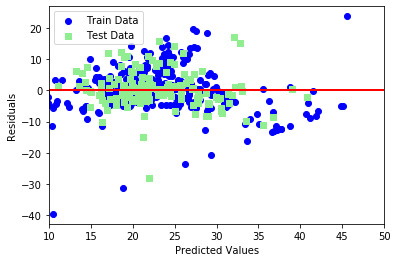

In [ ]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

In [ ]:
# 平均二乗誤差を評価するためのメソッドを呼び出し
from sklearn.metrics import mean_squared_error
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 44.983, Test : 40.412
R^2 Train : 0.500, Test : 0.434
